<h2>Imports</h2>

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
df = pd.read_csv('D:\\ML\\Titanic\\train.csv')

<h2>Helper functions</h2>

In [3]:
def hist(column):
    sns.distplot(df[column].dropna(), kde=False)
    plt.show()

In [4]:
def density(column):
    sns.distplot(df[column].dropna())
    plt.show()

In [249]:
def one_hot_encode(column):    
    for i in range(0, len(df[column].unique())):
        one_hot = df[column].unique()[i]
        df[str(column) + '_' + str(one_hot)] = list(np.array(df[column] == df[column].unique()[i]).astype(int))

In [156]:
def summarize(column):
    print(column)
    print("----------")
    print("Count:", df[column].count())
    print("NaN:", len(df[column]) - df[column].count())
    print("Min:", np.min(df[column].dropna()))
    print("Max:", np.max(df[column].dropna()))
    print("Mean:", np.mean(df[column].dropna()))
    print("Median:", np.median(df[column].dropna()))
    print("Std. dev.:", np.std(df[column]))

In [296]:
def survival_rates(column):
    print("Counts:")
    for c in df[column].unique():
        print("Class " + str(c) + ": " + str(sum(df[column]==c)))
    sns.barplot(x=df[column], y=df['Survived'])
    plt.show()

<h2>Summary</h2>

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Sex_male       891 non-null int64
Sex_female     891 non-null int64
Pclass_3       891 non-null int64
Pclass_1       891 non-null int64
Pclass_2       891 non-null int64
Embarked_S     891 non-null int64
Embarked_C     891 non-null int64
Embarked_Q     891 non-null int64
dtypes: float64(2), int64(13), object(5)
memory usage: 139.3+ KB


<h2>Categorical columns</h2>

Class 3: 491
Class 1: 216
Class 2: 184


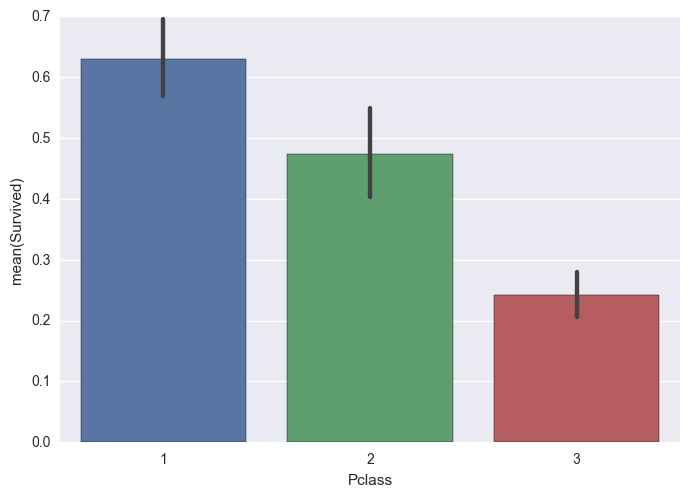

In [172]:
survival_rates('Pclass')

Class male: 577
Class female: 314


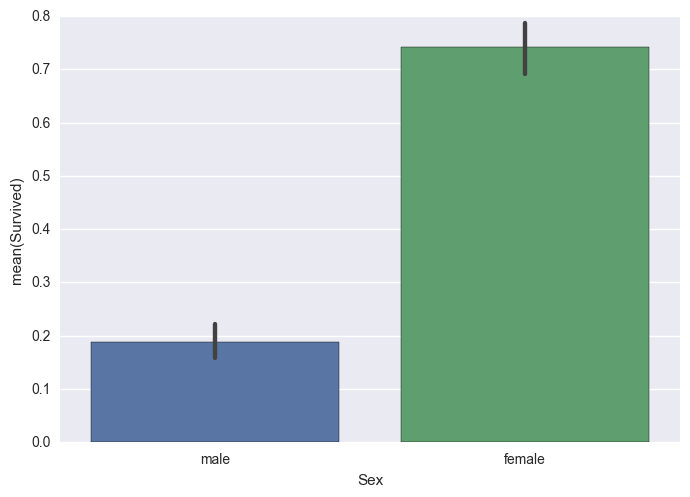

In [173]:
survival_rates('Sex')

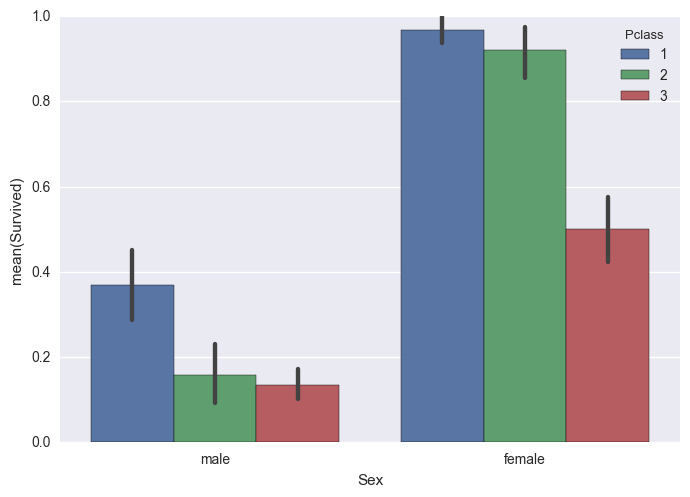

In [88]:
sns.barplot(x=df['Sex'], y=df['Survived'], hue=df['Pclass'])
plt.show()

Class S: 646
Class C: 168
Class Q: 77


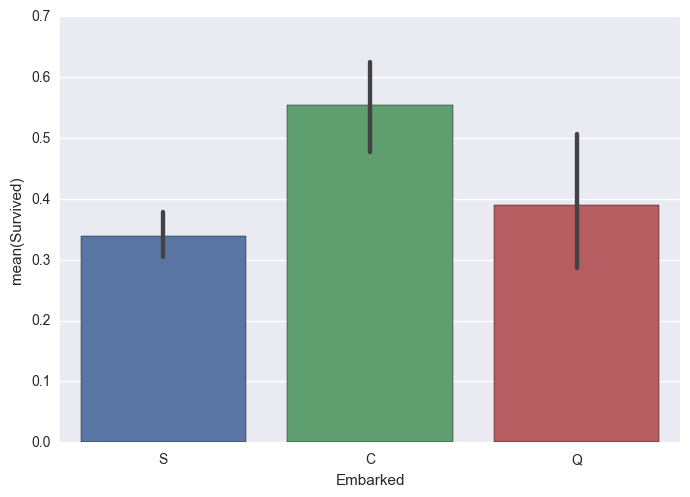

In [174]:
survival_rates('Embarked')

In [248]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The embarked column has two missing values. We could build a model to predict where these two sampled individuals embarked from, but it would add very little value to our model as a whole, considering that it's only two samples. We are content with imputing the most likely category based on simple metrics.

In [246]:
print("P(S|Class=1) =", df['Embarked'][(df['Pclass']==1) & (df['Embarked']=='S')].count()/df['Embarked'][df['Pclass']==1].count())
print("P(C|Class=1) =", df['Embarked'][(df['Pclass']==1) & (df['Embarked']=='C')].count()/df['Embarked'][df['Pclass']==1].count())
print("P(Q|Class=1) =", df['Embarked'][(df['Pclass']==1) & (df['Embarked']=='Q')].count()/df['Embarked'][df['Pclass']==1].count())

P(S|Class=1) = 0.597222222222
P(C|Class=1) = 0.393518518519
P(Q|Class=1) = 0.00925925925926


The prior probability of the passengers embarking from Southampton given that they were travelling 1st class is 60 %. Thus, we impute them with an 'S'.

In [303]:
df ['Embarked'] = df['Embarked'].fillna('S')

<h3>One-hot encoding</h3>
It seems pretty clear that class, gender and point of embarkation all contain good predictive power. Given that these are categorical values with very few unique categories and that we now have no missing values, we simply one-hot encode the columns, and we're done!

In [304]:
one_hot_encode('Sex')

In [305]:
one_hot_encode('Pclass')

In [306]:
one_hot_encode('Embarked')

<h2>Age</h2>

The age column has 177 missing values that need some sort of imputation.

The survival rate is pretty similar for most age groups, although it's notably higher for young kids and slightly lower for old people. As we can see in the box plot, the median age is exactly the same for both survivors and non-survivors.

In [159]:
summarize('Age')

Age
----------
Count: 714
NaN: 177
Min: 0.42
Max: 80.0
Mean: 29.69911764705882
Median: 28.0
Std. dev.: 14.516321150817317


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


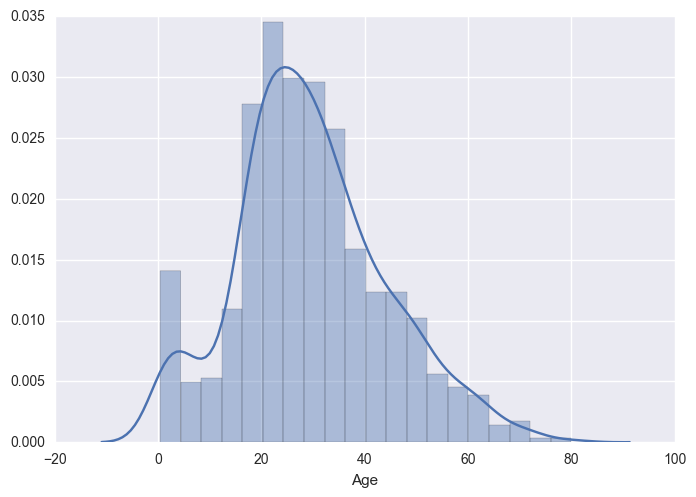

In [253]:
density('Age')

0 - 10: 62
10 - 20: 100
20 - 30: 205
30 - 40: 142
40 - 50: 76
50 - 60: 38
60 - 70: 15
70 - 80: 4


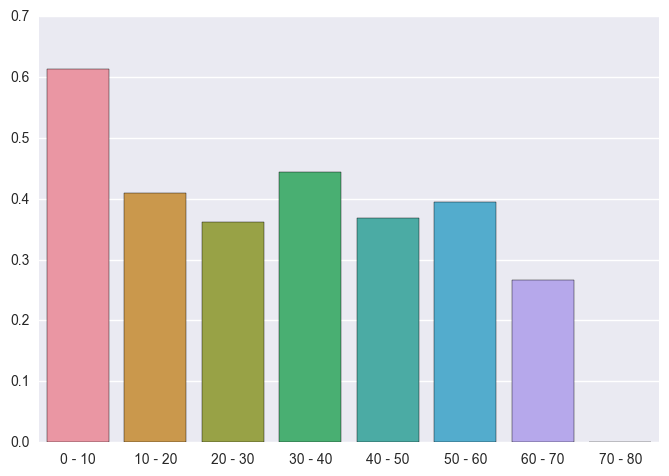

In [207]:
age_groups = []
survival_rates = []
for i in range(8):
    age_groups.append(str(i*10) + " - " + str(10 + (i*10)))
    survival_rates.append(np.mean(df['Survived'][(df['Age']>(i*10)) & (df['Age']<(10 + (i*10)))]))
    print(str(i*10) + " - " + str(10 + (i*10)) + ":", df['Survived'][(df['Age']>(i*10)) & (df['Age']<(10 + (i*10)))].count())
    
sns.barplot(x=age_groups, y=survival_rates)
plt.show()

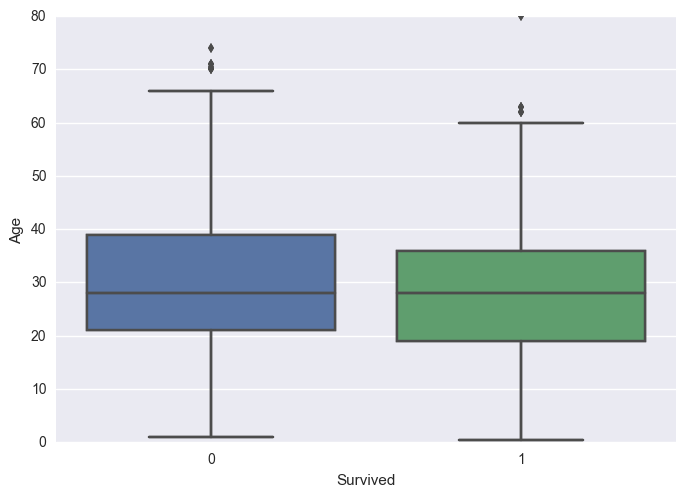

In [87]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

In [212]:
print("Survivors median age:", np.median(df['Age'][df['Survived']==1].dropna()))
print("Non-survivors median age:", np.median(df['Age'][df['Survived']==0].dropna()))

Survivors median age: 28.0
Non-survivors median age: 28.0


<h2>Fare</h2>

In [204]:
summarize('Fare')

Fare
----------
Count: 891
NaN: 0
Min: 0.0
Max: 512.3292
Mean: 32.2042079685746
Median: 14.4542
Std. dev.: 49.66553444477411


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


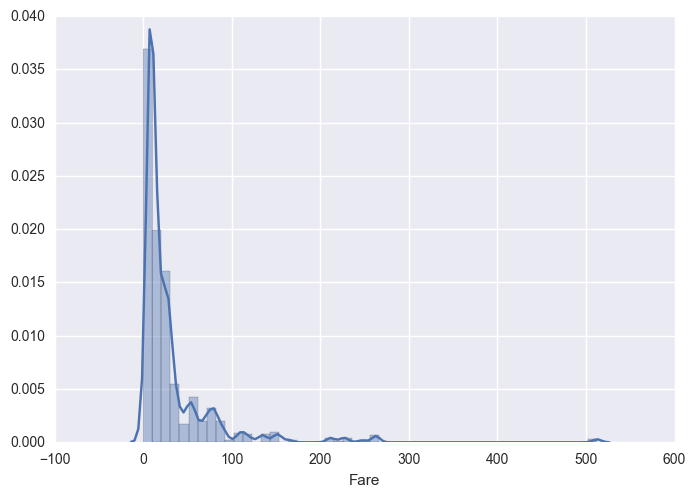

In [9]:
density('Fare')

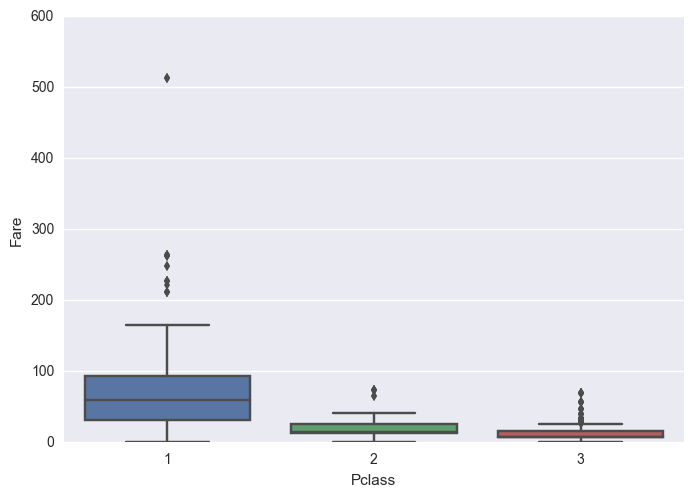

In [234]:
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.show()

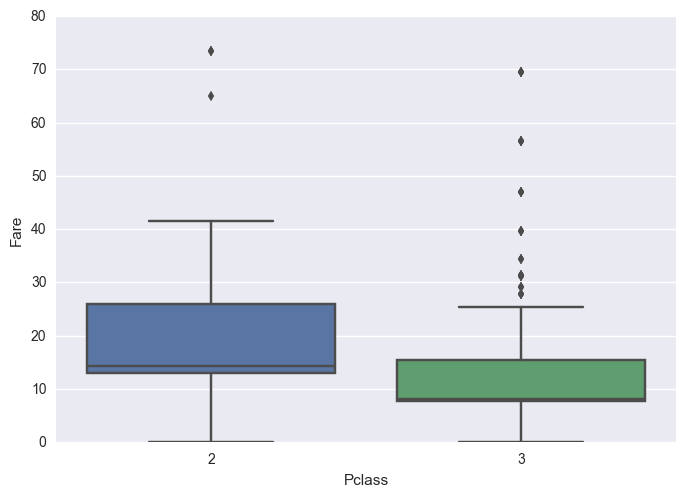

In [233]:
sns.boxplot(x="Pclass", y="Fare", data=df[df['Pclass']>1])
plt.show()

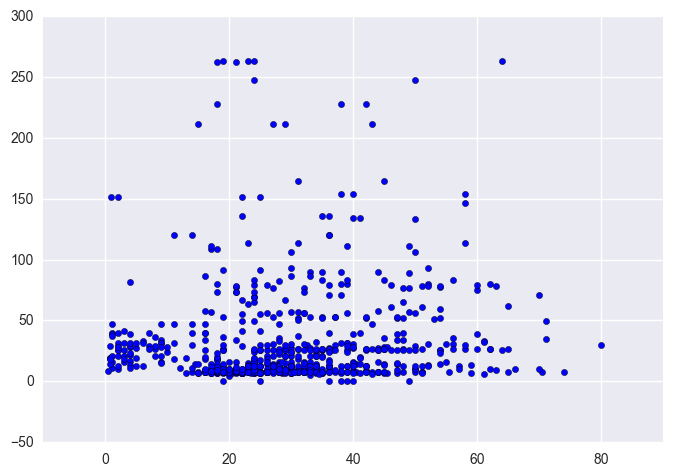

In [301]:
plt.scatter(df['Age'][df['Fare']<300], df['Fare'][df['Fare']<300])
plt.show()

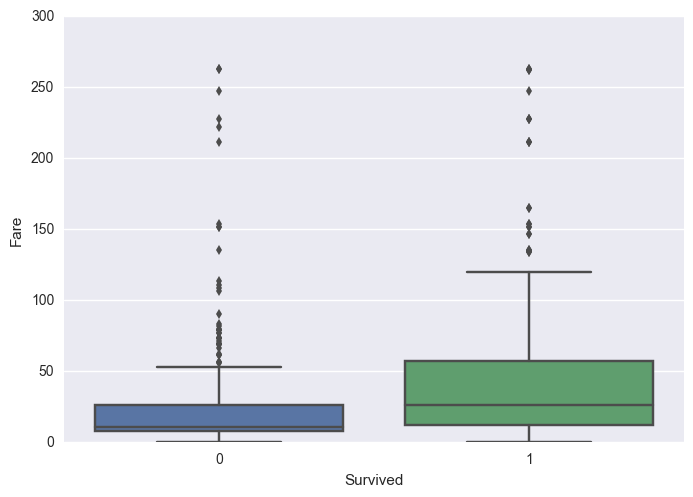

In [310]:
sns.boxplot(x="Survived", y="Fare", data=df[df['Fare']<300])
plt.show()

We see that the survivors clearly payed higher fares overall. This is not surprising, as the fare is highly correlated with passenger class, which was also shown to be a good predictor of survival. One outlier is not shown in the box plot.

There are no missing values in the fare column, so we will use it as is for the time being.

<h2>Families</h2>

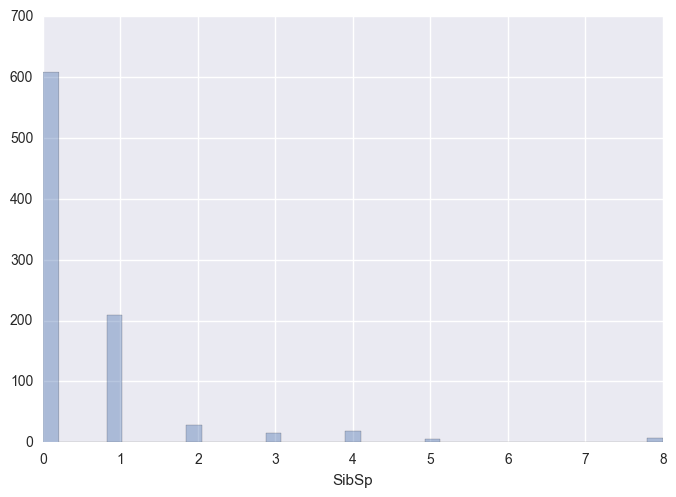

In [251]:
hist('SibSp')

Counts:
Class 1: 209
Class 0: 608
Class 3: 16
Class 4: 18
Class 2: 28
Class 5: 5
Class 8: 7


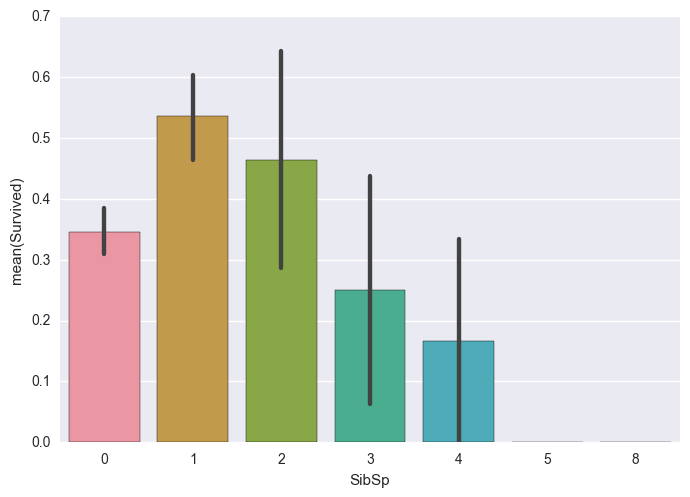

In [298]:
survival_rates('SibSp')

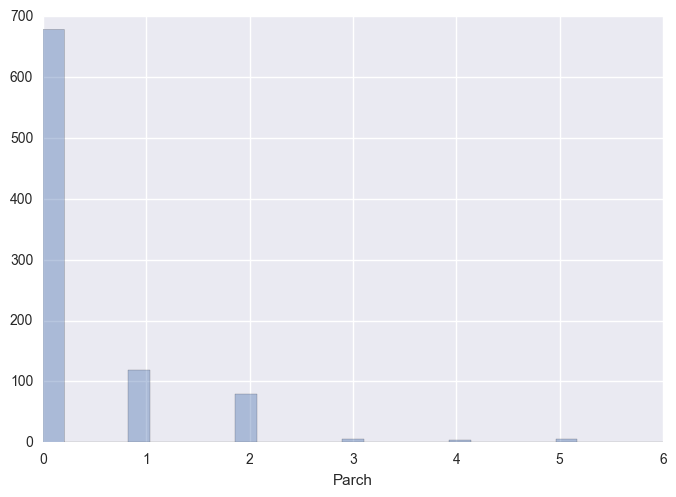

In [252]:
hist('Parch')

Counts:
Class 0: 678
Class 1: 118
Class 2: 80
Class 5: 5
Class 3: 5
Class 4: 4
Class 6: 1


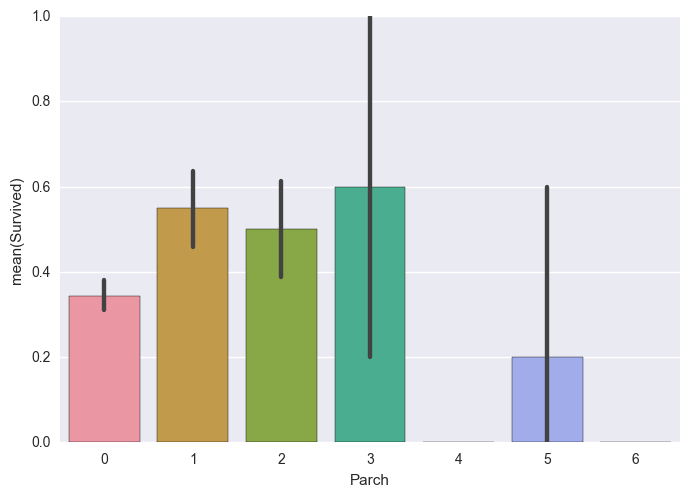

In [297]:
survival_rates('Parch')

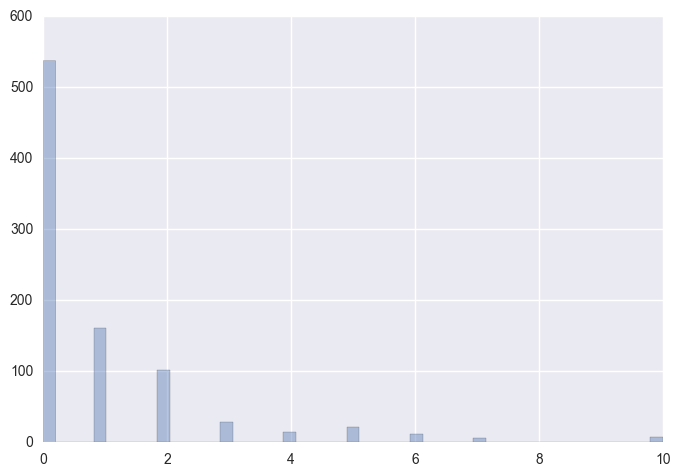

In [262]:
sns.distplot(df['SibSp'].dropna() + df['Parch'].dropna(), kde=False)
plt.show()

Counts:
0 family members: 537
1 family members: 161
2 family members: 102
3 family members: 29
4 family members: 15
5 family members: 22
6 family members: 12
7 family members: 6
8 family members: 0
9 family members: 0
10 family members: 7


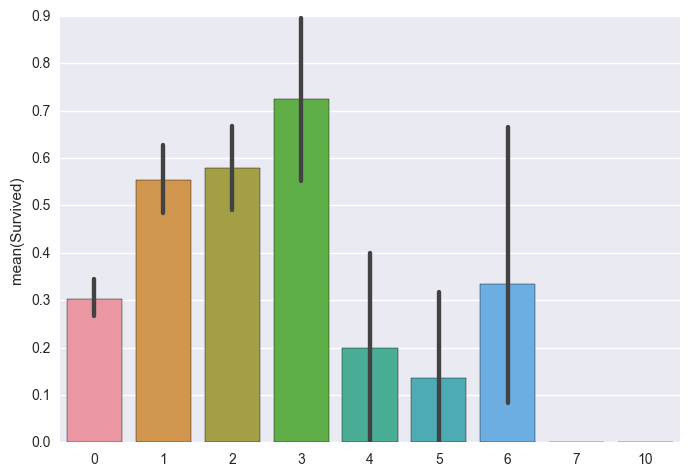

In [295]:
print("Counts:")
for i in range(11):
    print(str(i) + " family members:", df['PassengerId'][df['SibSp']+df['Parch']==i].count())
sns.barplot(x=df['SibSp']+df['Parch'], y=df['Survived'])
plt.show()

In [276]:
np.mean(df['Survived'][df['SibSp']+df['Parch']>3])

0.16129032258064516

The survival rate for single travellers is 30 %, while the survival rate for passenger travelling with 1 to 3 family members is around 60%. However, the survival rate among the 56 passengers travelling with 4 or more family members is an abysmal 16 %. Looking at the bar chart above, this is a pretty clear trend. Thus, it makes sense to categorize everyone into three broad family classes: 0, 1-3 and 4+. This will help prevent overfitting.

In [291]:
df['Family_no'] = pd.Series()
df['Family_no'] = (df['SibSp']+df['Parch']==0).astype(int)

In [292]:
df['Family_small'] = pd.Series()
df['Family_small'] = ((df['SibSp']+df['Parch']>0)&(df['SibSp']+df['Parch']<4)).astype(int)

In [293]:
df['Family_large'] = pd.Series()
df['Family_large'] = (df['SibSp']+df['Parch']>3).astype(int)

<h2>Ticket</h2>

<h2>Cabin</h2>

<h2>Name</h2>